# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import zipfile
import pickle

data_files = ['train.zip', 'valid.zip', 'test.zip']
data_folder = './data/'

for file in data_files:
    zip_ref = zipfile.ZipFile(data_folder + file, 'r')
    zip_ref.extractall(data_folder)
    zip_ref.close()

training_file = './data/train.p'
validation_file = './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [63]:
# Number of training samples
n_train = X_train.shape[0]

# Number of validation samples
n_validation = X_valid.shape[0]

# Number of testing samples
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# Number of unique classes/labels
n_classes = len(set(y_train) | set(y_valid) | set(y_test))

print("Number of training samples =", n_train)
print("Number of validation samples =", n_validation)
print("Number of testing samples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training samples = 34799
Number of validation samples = 4410
Number of testing samples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

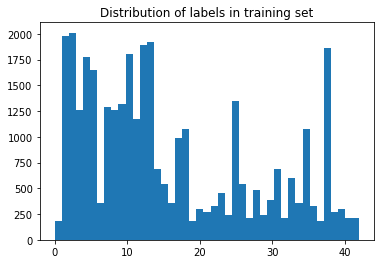

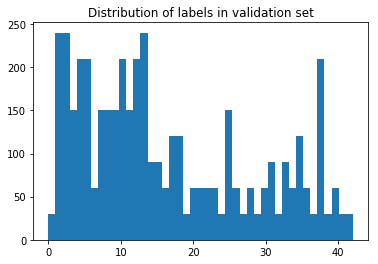

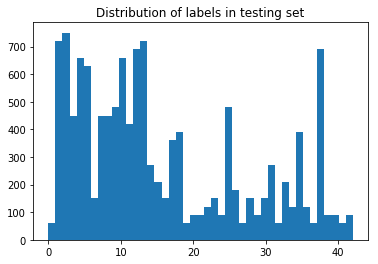

Some random image samples from training set


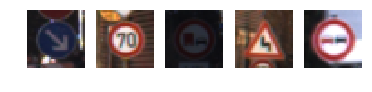

In [62]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Distribution of signs in training, validation and testing sets
plt.figure()
plt.hist(y_train, n_classes);
plt.title('Distribution of labels in training set')
plt.figure()
plt.hist(y_valid, n_classes);
plt.title('Distribution of labels in validation set')
plt.figure()
plt.hist(y_test, n_classes);
plt.title('Distribution of labels in testing set')
plt.show()

# Some random image samples from training set
print('Some random image samples from training set')
n = 5
plt.figure()
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(X_train[random.randint(1, n_train)])
    plt.axis('off')
    pass
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Data Preprocessing

In [64]:
# Data normalization
X_train = X_train / 127.5 - 1.0
X_valid = X_valid / 127.5 - 1.0
X_test = X_test / 127.5 - 1.0

### Setup TensorFlow

In [15]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

### Network Architecture

In [16]:
def conv_layer(x, w, b, strides=1):
    x = tf.nn.conv2d(x, w, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x

def maxpool_layer(x, strides=2):
    x = tf.nn.max_pool(x, ksize=[1, strides, strides, 1], strides=[1, strides, strides, 1], padding='VALID')
    return x

def fc_layer(x, w, b):
    x = tf.matmul(x, w)
    x = tf.add(x, b)
    return x

def CNN(x):
    
    # Arguments used for tf.truncated_normal
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    wc1 = tf.Variable(tf.truncated_normal([5, 5, 3, 12], mean=mu, stddev=sigma))
    bc1 = tf.Variable(tf.zeros([12]))
    cl1 = conv_layer(x, wc1, bc1)
    
    # Activation.
    cl1 = tf.nn.relu(cl1)
    
    # Pooling. Input = 28x28x12. Output = 14x14x12.
    cl1 = maxpool_layer(cl1)

    # Layer 2: Convolutional. Input = 14x14x12. Output = 10x10x24.
    wc2 = tf.Variable(tf.truncated_normal([5, 5, 12, 24], mean=mu, stddev=sigma))
    bc2 = tf.Variable(tf.zeros([24]))
    cl2 = conv_layer(cl1, wc2, bc2)
    
    # Activation.
    cl2 = tf.nn.relu(cl2)

    # Pooling. Input = 10x10x24. Output = 5x5x24.
    cl2 = maxpool_layer(cl2)

    # Flatten. Input = 5x5x24. Output = 600.
    cl2 = tf.contrib.layers.flatten(cl2)
    
    # Layer 3: Fully Connected. Input = 600. Output = 180.
    wfc3 = tf.Variable(tf.truncated_normal([600, 180], mean=mu, stddev=sigma))
    bfc3 = tf.Variable(tf.zeros([180]))
    fcl3 = fc_layer(cl2, wfc3, bfc3)
    
    # Activation.
    fcl3 = tf.nn.relu(fcl3)
    
    # Dropout.
    fcl3 = tf.nn.dropout(fcl3, keep_prob)

    # Layer 4: Fully Connected. Input = 180. Output = 130.
    wfc4 = tf.Variable(tf.truncated_normal([180, 130], mean=mu, stddev=sigma))
    bfc4 = tf.Variable(tf.zeros([130]))
    fcl4 = fc_layer(fcl3, wfc4, bfc4)
    
    # Activation.
    fcl4 = tf.nn.relu(fcl4)
        
    # Dropout.
    fcl4 = tf.nn.dropout(fcl4, keep_prob)

    # Layer 5: Fully Connected. Input = 130. Output = 43.
    wfc5 = tf.Variable(tf.truncated_normal([130, 43], mean=mu, stddev=sigma))
    bfc5 = tf.Variable(tf.zeros([43]))
    logits = fc_layer(fcl4, wfc5, bfc5)
    
    return logits

### Features and Labels

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

### Training Pipeline

In [18]:
rate = 0.001

logits = CNN(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples, total_loss / num_examples

### Train the Model

In [20]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy, validation_loss = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))        
        print("Validation Loss = {:.3f}".format(validation_loss))       
        print()
        
    saver.save(sess, './traffic_sign_cnn')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.720
Validation Loss = 0.990

EPOCH 2 ...
Validation Accuracy = 0.885
Validation Loss = 0.420

EPOCH 3 ...
Validation Accuracy = 0.921
Validation Loss = 0.279

EPOCH 4 ...
Validation Accuracy = 0.930
Validation Loss = 0.247

EPOCH 5 ...
Validation Accuracy = 0.946
Validation Loss = 0.176

EPOCH 6 ...
Validation Accuracy = 0.950
Validation Loss = 0.173

EPOCH 7 ...
Validation Accuracy = 0.952
Validation Loss = 0.168

EPOCH 8 ...
Validation Accuracy = 0.956
Validation Loss = 0.150

EPOCH 9 ...
Validation Accuracy = 0.950
Validation Loss = 0.184

EPOCH 10 ...
Validation Accuracy = 0.961
Validation Loss = 0.135

Model saved


### Evaluate the Model

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, test_loss = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test Loss = {:.3f}".format(test_loss))

Test Accuracy = 0.946
Test Loss = 0.268


## Step 3: Test the Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

TopKV2(values=array([[  9.77261901e-01,   2.26901658e-02,   4.60474694e-05,
          1.62620472e-06,   2.80897638e-07],
       [  9.91640329e-01,   5.47686405e-03,   2.34300317e-03,
          5.38152701e-04,   1.09886162e-06],
       [  9.47167218e-01,   5.28322682e-02,   5.26763188e-07,
          2.55727759e-08,   1.97646166e-08],
       [  9.95845854e-01,   2.76172021e-03,   1.00969640e-03,
          2.45343108e-04,   1.06174368e-04],
       [  9.68878806e-01,   2.76374780e-02,   3.39765102e-03,
          8.53749079e-05,   4.01559333e-07]], dtype=float32), indices=array([[23, 30, 29, 31, 28],
       [ 5, 10,  3,  7, 16],
       [ 8,  7,  5,  3,  2],
       [14, 29, 25, 17,  1],
       [25, 29, 22, 31, 21]]))


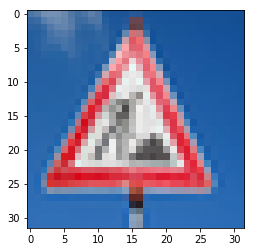

In [44]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image
import numpy as np

sample_images = ['slippery_road.jpg', '80_kmh.jpg', '120_kmh.jpg', 'stop.jpg', 'road_work.jpg']
sample_folder = './data/'

sample_data = []
for file in sample_images:
    img = Image.open(sample_folder + file)
    img = img.resize((32, 32), Image.ANTIALIAS)    
    sample_data.append(np.array(img))
    plt.imshow(img)

sample_data = (np.array(sample_data) - 128.0) / 128.0
   
softmax = tf.nn.softmax(logits=logits)
nn_top_k = tf.nn.top_k(softmax, k=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print(sess.run(nn_top_k, feed_dict={x: sample_data, keep_prob: 1.0}))

### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [15]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.